In [1]:
using Pkg
Pkg.add("CalculusWithJulia")
using CalculusWithJulia

┌ Warning: could not download https://pkg.julialang.org/registries
│   exception = Downloads.RequestError("https://pkg.julialang.org/registries", 6, "Could not resolve host: pkg.julialang.org", Downloads.Response(nothing, "https://pkg.julialang.org/registries", 0, "", Pair{String, String}[]))
└ @ Pkg.Registry C:\Users\CHANDANA\.julia\juliaup\julia-1.11.6+0.x64.w64.mingw32\share\julia\stdlib\v1.11\Pkg\src\Registry\Registry.jl:77
   Resolving package versions...
  No Changes to `C:\Users\CHANDANA\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\CHANDANA\.julia\environments\v1.11\Manifest.toml`
Precompiling project...
  12840.4 ms  ? Modia
  16996.6 ms  ? Modia3D


In [5]:
using Pkg
Pkg.add("Plots")
using Plots
plotly()

   Resolving package versions...
  No Changes to `C:\Users\CHANDANA\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\CHANDANA\.julia\environments\v1.11\Manifest.toml`
Precompiling project...
  13842.3 ms  ? Modia
  16706.5 ms  ? Modia3D


Plots.PlotlyBackend()

In [2]:
using Plots

### 1

In [3]:
xlim=(-5,5)
ylim=(-5,5)
nx=30 
ny=30

dx, dy = (xlim[2]-xlim[1])/nx, (ylim[2]-ylim[1])/ny
xs, ys = xlim[1]:dx:xlim[2], ylim[1]:dy:ylim[2]

ps = [[x,y] for x in xs for y in ys];
gr()

h(x, y) = 200 - x^2 - 2y^2
h(z) = h(z...)

h (generic function with 2 methods)

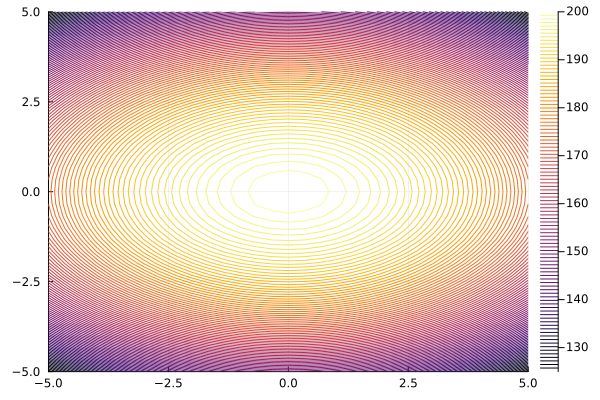

In [4]:
p = contour(xs, ys, h, nlevels=100)

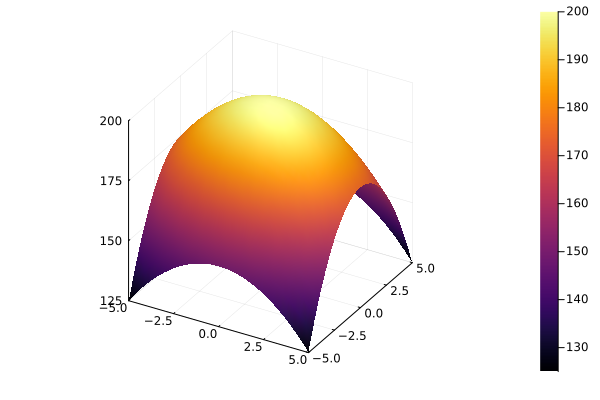

In [5]:
p = surface(xs, ys, h, nlevels=200)

#### Gradient of a Scalar Field

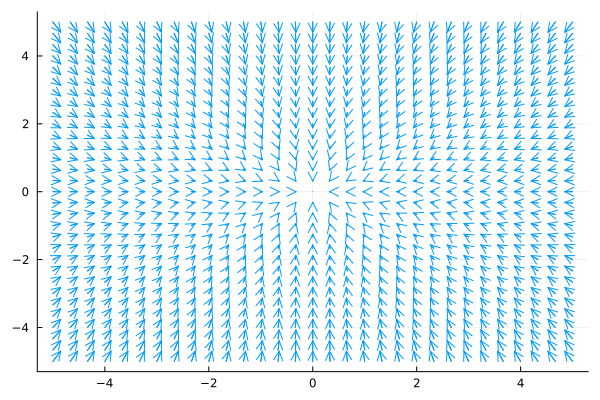

In [6]:
vs = gradient(h).(ps)
λ = 0.9* minimum([u/maximum(getindex.(vs,i)) for (i,u) in enumerate((dx,dy))])
 quiver(unzip(ps)..., quiver=unzip(λ * vs))

### Vector Field

### 2a.VectorField

In [7]:
using Statistics
using LinearAlgebra

In [8]:
f(x,y) = [(x) ,-(y^2)]
f(v) = f(v...)

f (generic function with 2 methods)

In [9]:
xlimv =(-1,1)
ylimv =(-1,1)
nxv =20
nyv =20

dxv, dyv = (xlimv[2]-xlimv[1])/nxv, (ylimv[2]-ylimv[1])/nyv
xsv, ysv = xlimv[1]:dxv:xlimv[2], ylimv[1]:dyv:ylimv[2]

psv = [[x,y] for x in xsv for y in ysv];

vss = (f).(psv);

mean_spacing = (dxv + dyv) / 2
mean_magnitude = mean(norm.(vss))
λv = 0.5 * mean_spacing / mean_magnitude 
#λ = 0.9* minimum([u/maximum(getindex.(vss,i)) for (i,u) in enumerate((dxv,dyv))])
 

0.07040615892154516

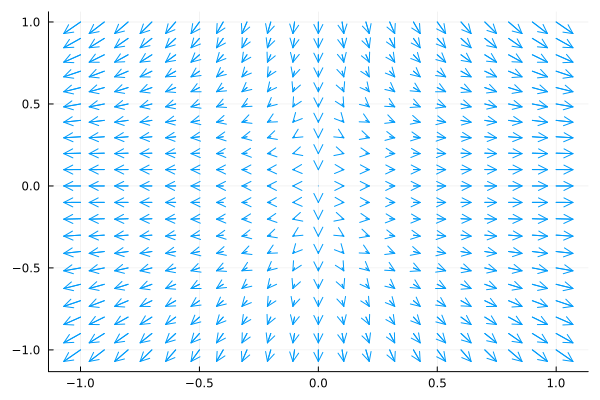

In [10]:
#Plotting Vector Field
quiver(unzip(psv)..., quiver=unzip(λv * vss))

### 2b.Divergence of a Vector Field

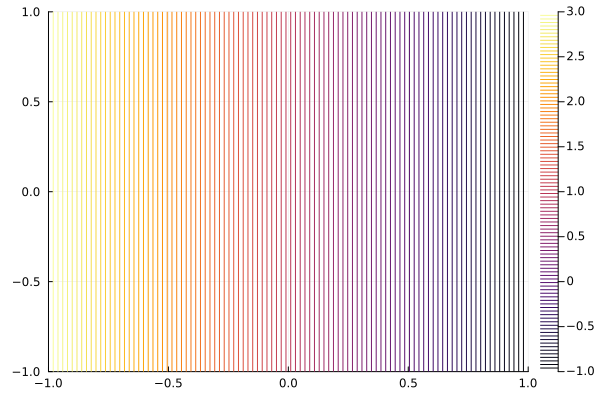

In [ ]:
vd = divergence(f).(psv)
pdiv = contour(xsv, ysv, vd, nlevels=100);

### Verification with actual value of Divergence

In [12]:
checkvd(x,y) = 1 + -2*y # Actual expression for divergence
checkvd(v) = checkvd(v...)

checkvd (generic function with 2 methods)

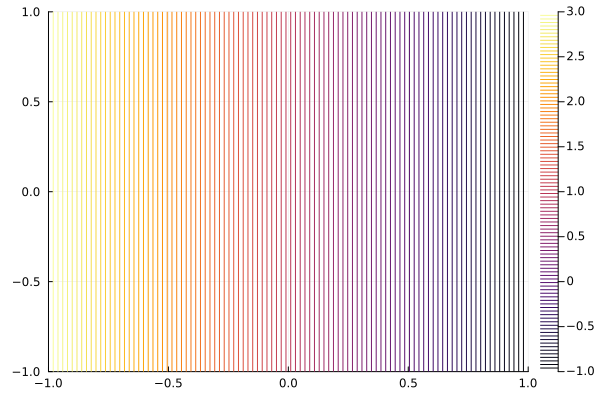

In [ ]:
cDiv = checkvd.(psv);
pdiv2=contour(xsv, ysv, cDiv, nlevels=100);


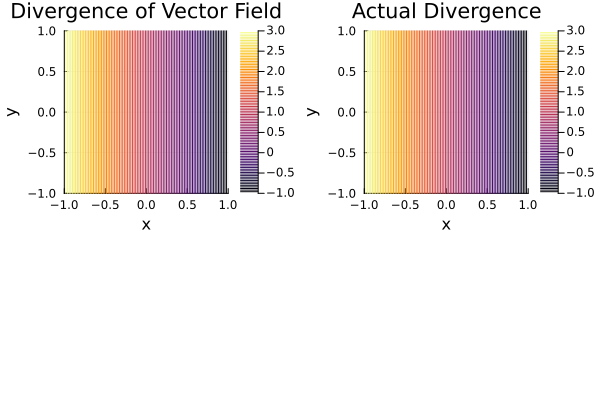

In [19]:
plot(pdiv,pdiv2,layout=(2,2),legend=true,
        title=["Divergence of Vector Field" "Actual Divergence"],
        xlabel="x", ylabel="y",
        )

 ### 2c.Curl of a Vector field

In [20]:
vcl = curl(f).(psv);
pcurl = contour(xsv, ysv, vcl, nlevels=100);

### Verification with actual value of Curl

In [21]:
checkvcl(x,y) = 0 # Actual expression for curl
checkvcl(v) = checkvcl(v...)

checkvcl (generic function with 2 methods)

In [22]:
cCurl = checkvcl.(psv);
pcurl2=contour(xsv, ysv, cCurl, nlevels=200);

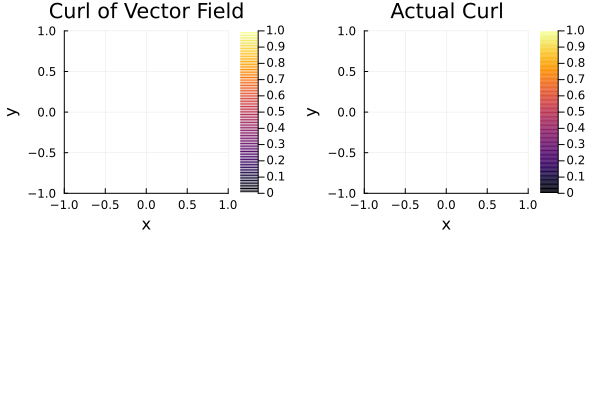

In [23]:
plot(pcurl,pcurl2,layout=(2,2),legend=true,
        title=["Curl of Vector Field" "Actual Curl"],
        xlabel="x", ylabel="y",
        )

### 3a.Vector Field

In [24]:
fmc(x,y) = [(exp(x)) * y^2 ,(x + 2*y)]
fmc(v) = fmc(v...)

fmc (generic function with 2 methods)

In [25]:
xlimv =(-1,1)
ylimv =(-1,1)
nxv =20
nyv =20

dxv, dyv = (xlimv[2]-xlimv[1])/nxv, (ylimv[2]-ylimv[1])/nyv
xsv, ysv = xlimv[1]:dxv:xlimv[2], ylimv[1]:dyv:ylimv[2]

psv = [[x,y] for x in xsv for y in ysv];

vss = (fmc).(psv);

mean_spacing = (dxv + dyv) / 2
mean_magnitude = mean(norm.(vss))
λv = 0.5 * mean_spacing / mean_magnitude 

0.039283001525475626

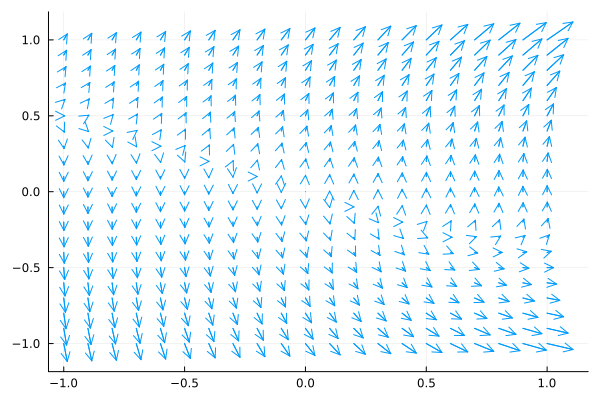

In [26]:
#Plotting Vector Field
quiver(unzip(psv)..., quiver=unzip(λv * vss))

### 3b.Divergence of a Vector Field

In [27]:
vd = divergence(fmc).(psv)
pdiv = contour(xsv, ysv, vd, nlevels=200);

### Verification with actual value of Divergence

In [28]:
checkvd(x,y) = exp(x)*y^2 + 2 # Actual expression for divergence
checkvd(v) = checkvd(v...)

checkvd (generic function with 2 methods)

In [29]:
cDiv = checkvd.(psv);
pdiv2=contour(xsv, ysv, cDiv, nlevels=200);

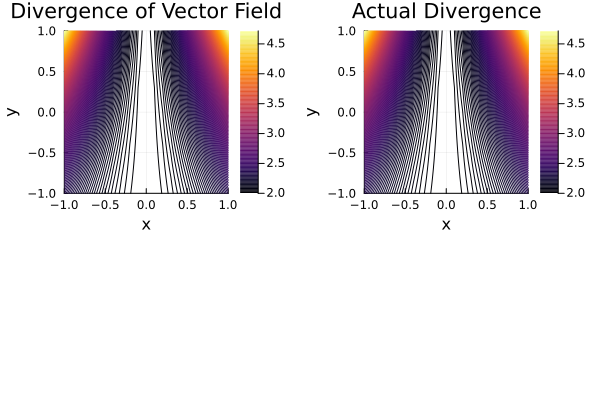

In [30]:
plot(pdiv,pdiv2,layout=(2,2),legend=true,
        title=["Divergence of Vector Field" "Actual Divergence"],
        xlabel="x", ylabel="y",
        )

### 3c.Curl of a Vector field

In [35]:
vcl = curl(fmc).(psv);
pcurl = contour(xsv, ysv, vcl, nlevels=200);

### Verification with actual value of Curl

In [32]:
checkvcl(x,y) = 1 - 2*exp(x)*y # Actual expression for curl
checkvcl(v) = checkvcl(v...)

checkvcl (generic function with 2 methods)

In [33]:
cCurl = checkvcl.(psv);
pcurl2=contour(xsv, ysv, cCurl, nlevels=200);

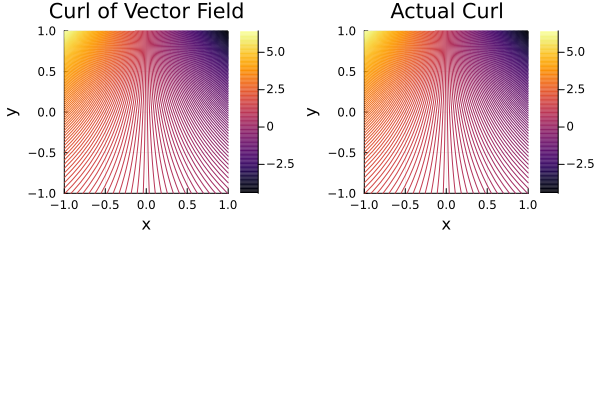

In [36]:
plot(pcurl,pcurl2,layout=(2,2),legend=true,
        title=["Curl of Vector Field" "Actual Curl"],
        xlabel="x", ylabel="y",
        )

### 4.SFD & BMD

In [71]:
using Plots 

In [72]:
function SFD(q,l)
    # Define the x-axis for the entire beam length
    x = 0:l/100:1.25*l

    # Initialize an array to store the shear force values
    s_val = zeros(length(x))

    # Loop through each x value to apply the correct shear force formula
    for i in 1:length(x)
        if x[i] <= l
            s_val[i] = 15*q*l/32 - q*x[i]
        else
            s_val[i] = (15*q*l/32 + 25*q*l/32) - q*x[i]
        end
    end

    # Define the reaction forces for plotting
    Ra = 0:l/100:15*q*l/32
    Rb = 0:-l/100:(25*q*l/32)
    len = l*ones(length(Rb))
    
    # Plot the results
    # Requires the Plots.jl package
    # using Plots
    plot(x, s_val, label="Shear Force",title="Shear Force Diagram",xlabel="Length (m)",ylabel="Shear Force (KN)",legend=:topright)
    plot!(x, 0*x, label="Zero Line",c=:black)
    plot!(0*Ra, Ra, label="Reaction A",opacity=5000)
    plot!(len, Rb, label="Reaction B",opacity=50)
end

SFD (generic function with 1 method)

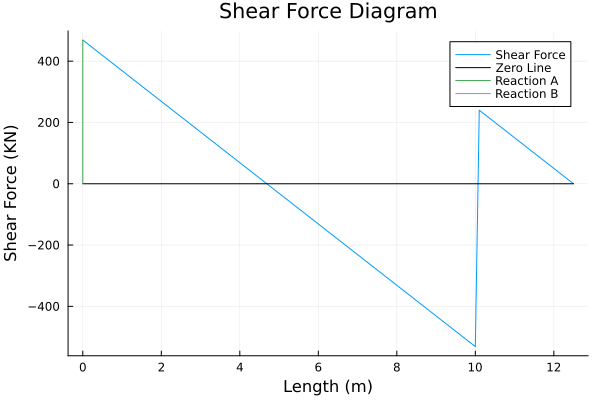

In [73]:
using Plots
SFD(100,10)

In [74]:
function BMD(q,l)
    x=0:l/100:1.25*l
    B_val=zeros(length(x))
    for i in 1:length(x)
    if x[i]<=l
        B_val[i]=15*q*l*x[i]/32-q*x[i]*x[i]/2
        else 
            B_val[i]=(15*q*l*(x[i])/32)-q*x[i]*x[i]/2+(25*q*l*(x[i]-l)/32)
        end 
    end
    
   
    
    # Plot the results
    plot(x, B_val, label="Bending Moment", color="blue", title="Bending Moment Diagram",xlabel="Length (m)",ylabel="Bending Moment  (KN-m)",legend=:topright)
    plot!(x, 0*x, label="Zero Line", color="black", linestyle=:dash)
end

BMD (generic function with 1 method)

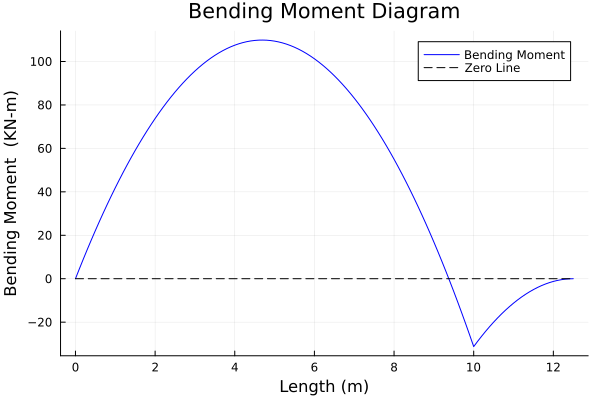

In [75]:
BMD(10,10)

### 5.SFD & BMD

In [68]:
function SFD(q,l)
    # Define the x-axis for the entire beam length
    x = 0:l/100:2.0*l

    # Initialize an array to store the shear force values
    s_val = zeros(length(x))

    # Loop through each x value to apply the correct shear force formula
    for i in 1:length(x)
        if x[i] <= 0.4*l
            s_val[i] = 0.4*q*l
        elseif  0.4*l<x[i] <=l
            s_val[i] = (0.4*q*l- 0.8*q*l)
        #elseif  0.8*l<x[i] <=1*l
            #s_val[i] = (0.4*q*l- 0.8*q*l) 
        elseif  l<x[i] <2*l 
             s_val[i] = (0.4*q*l- 0.8*q*l+0.98*q*l-q*(x[i]-l)) 
        else 
             s_val[i] = (0.4*q*l- 0.8*q*l+0.98*q*l-q*l+0.42*q*l)
            end
            
    end

    # Define the reaction forces for plotting
    Ra = 0:l/100:0.4*q*l
    Rb = 0:-l/100:(0.98*q*l)
    Rc = 0:-l/100:(0.42*q*l)
    len1 = l*ones(length(Rb))
    len2 = 2*l*ones(length(Rc))
    
    
    # Plot the results
    # Requires the Plots.jl package
    # using Plots
    plot(x, s_val, label="Shear Force",title ="Shear Force Diagram",xlabel="Length (m)",ylabel="Shear Force (KN)",legend=:topright)
    plot!(x, 0*x, label="Zero Line",c=:black)
    plot!(0*Ra, Ra, label="Reaction A")
    plot!(len1, Rb, label="Reaction B")
    plot!(len2, Rc, label="Reaction C")
end

SFD (generic function with 1 method)

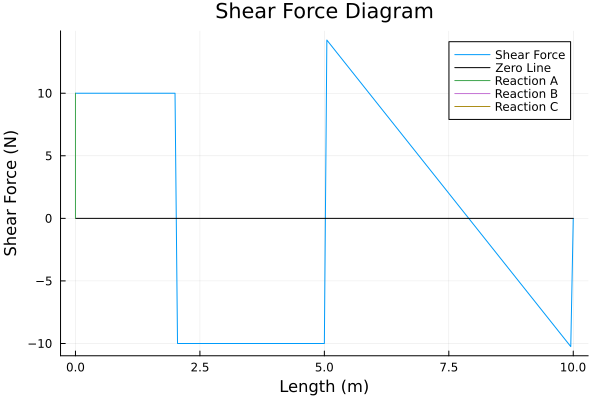

In [67]:
using Plots
SFD(5,5)

In [65]:
function BMD(q,l)
    # Define the x-axis for the entire beam length
    x = 0:l/100:2.0*l

    # Initialize an array to store the bending moment values
    bm_val = zeros(length(x))

    # Loop through each x value to apply the correct bending moment  formula
    for i in 1:length(x)
        if x[i] <= 0.4*l
            bm_val[i] = 0.4*q*l*x[i]
        elseif  0.4*l<x[i] <=l
            bm_val[i] = (0.4*q*l*x[i]- 0.8*q*l*(x[i]-0.4*l))
        elseif  l<x[i] <2*l 
             bm_val[i] = (0.4*q*l*x[i]- 0.8*q*l*(x[i]-0.4*l)+0.98*q*l*(x[i]-l)-(q*(x[i]-l)*q*(x[i]-l)/2)) 
            end
            
    end

    # Plot the results
    plot(x, bm_val, label="Bending Moment", color="blue", title="Bending Moment Diagram",xlabel="Length (m)",ylabel="Bending moment (KN-m)",legend=:bottomleft)
    plot!(x, 0*x, label="Zero Line", color="black", linestyle=:dash)
end

BMD (generic function with 1 method)

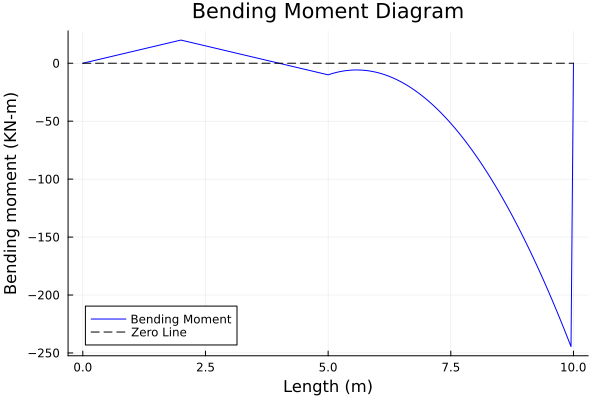

In [66]:
BMD(5,5)